In [ ]:
# Observations:
#     1) It is difficult to get an overall sense of the compound scores of each news organization because the polarity 
#     of the tweets changes drastically from hour to hour. We would need a much larger sample size to make broader generalizations.
#     2) BBC has the most extremely negative compound scores.
#     3) CBS hasthe most extremely positive compound scores.
    
# * extremely defined as scores rating at or above/below .75 and -.75

In [19]:
# Dependencies
import seaborn as sns
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

oldest_tweet = None

# List for dictionaries of results
results_list = []
sentiments = []

# Loop through each user
for user in target_user:
    
    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                            "Username" : user,
                            "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            # Add to counter 
            counter += 1
            
                # Add each value to the appropriate list
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)

    # Create a dictionaty of results
    user_results = {
    "Username": user,
    "Compound Score": np.mean(compound_list),
    "Postive Score": np.mean(positive_list),
    "Neutral Score": np.mean(neutral_list),
    "Negative Score": np.mean(negative_list),
    }

    # Append dictionary to list
    results_list.append(user_results)

In [21]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
print(len(sentiments_pd))
sentiments_pd.to_csv("Images/sentimentspertweet.csv")
sentiments_pd.head()

500


,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,Username
0,0.0000,Tue Oct 02 19:02:07 +0000 2018,1.000,0.000,0.000,Discover the extraordinary story of how a smal...,1,@BBC
1,-0.8020,Tue Oct 02 17:55:03 +0000 2018,0.573,0.427,0.000,Knife crime is up 22%. Who are the victims and...,2,@BBC
2,0.4019,Tue Oct 02 17:06:06 +0000 2018,0.847,0.000,0.153,The gender reveal party that sparked a massive...,3,@BBC
3,0.7096,Tue Oct 02 16:06:02 +0000 2018,0.766,0.000,0.234,"In 2002, Iberian Lynx were the rarest cats in ...",4,@BBC
4,-0.2732,Tue Oct 02 14:06:04 +0000 2018,0.554,0.242,0.204,Two scientists who discovered how to fight can...,5,@BBC


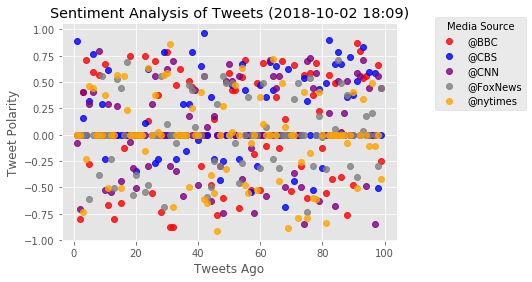

In [22]:
# Breakdown sentiments dataframe by news organization
bbc_x_vals = sentiments_pd[0:99]["Tweets Ago"]
bbc_y_vals = sentiments_pd[0:99]["Compound"]

cbs_x_vals = sentiments_pd[100:199]["Tweets Ago"]
cbs_y_vals = sentiments_pd[100:199]["Compound"]

cnn_x_vals = sentiments_pd[200:299]["Tweets Ago"]
cnn_y_vals = sentiments_pd[200:299]["Compound"]

fox_x_vals = sentiments_pd[300:399]["Tweets Ago"]
fox_y_vals = sentiments_pd[300:399]["Compound"]

ny_x_vals = sentiments_pd[400:499]["Tweets Ago"]
ny_y_vals = sentiments_pd[400:499]["Compound"]

# sns.lmplot(x = "Tweets Ago", y = "Compound", data = sentiments_pd, fit_reg=False, hue="Username")

bbcplot = plt.plot(bbc_x_vals, bbc_y_vals, marker="o", color="red", linewidth=0,alpha=0.8, label="@BBC")
cbsplot = plt.plot(cbs_x_vals, cbs_y_vals, marker="o", color="blue", linewidth=0,alpha=0.8, label="@CBS")
cnnplot = plt.plot(cnn_x_vals, cnn_y_vals, marker="o", color="purple", linewidth=0,alpha=0.8, label="@CNN")
foxplot = plt.plot(fox_x_vals, fox_y_vals, marker="o", color="grey", linewidth=0,alpha=0.8, label="@FoxNews")
nyplot = plt.plot(ny_x_vals, ny_y_vals, marker="o", color="orange", linewidth=0,alpha=0.8, label="@nytimes")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(title="Media Source", bbox_to_anchor=(1.1, 1.05))
# plt.legend(handles=(bbcplot, cbsplot, cnnplot, foxplot, nyplot), title="Media Source", loc="best")
plt.savefig("Images/sentimentanalysistweets.png")
plt.show()

In [23]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list).round(3)
sentiments_pd.to_csv("Images/sentimentspernewsorg.csv")
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Username
0,0.000,0.0,1.000,0.000,@BBC
1,0.604,0.0,0.775,0.225,@CBS
2,0.586,0.0,0.814,0.186,@CNN
3,0.565,0.0,0.819,0.181,@FoxNews
4,0.000,0.0,1.000,0.000,@nytimes


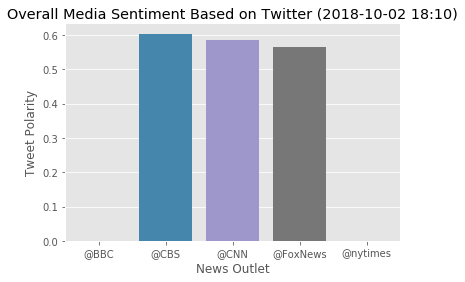

In [24]:
sns.barplot(x = "Username", y = "Compound Score", data = results_df)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Outlet")
plt.savefig("Images/overallmediasentiment.png")
plt.show()